# Making plots visualizing the model performance

In [7]:
%load_ext autoreload
%autoreload 2
import joblib 
import numpy as np

import matplotlib.pyplot as plt

from colorml.utils.utils import plot_prediction_dist, read_pickle

%matplotlib inline

In [3]:
model_median = joblib.load('../results/gbm/regressor_medianrun_2020_06_08_12_59_1591613951.joblib')
model_01 = joblib.load('../results/gbm/regressor_0_1run_2020_06_08_12_59_1591613951.joblib')
model_09 = joblib.load('../results/gbm/regressor_0_9run_2020_06_08_12_59_1591613951.joblib')
model_mean = joblib.load('../results/gbm/regressor_meanrun_2020_06_08_12_59_1591613951.joblib')

X_test = np.load('../results/gbm/X_test_run_2020_06_08_12_59_1591613951.npy')
X_train = np.load('../results/gbm/X_train_run_2020_06_08_12_59_1591613951.npy')
y_train = np.load('../results/gbm/y_train_run_2020_06_08_12_59_1591613951.npy')
y_test = np.load('../results/gbm/y_test_run_2020_06_08_12_59_1591613951.npy')
names = np.load('../results/gbm/y_names_run_2020_06_08_12_59_1591613951.npy', allow_pickle=True)

In [4]:
quantile01_prediction = model_01.predict(X_test)
quantile09_prediction = model_09.predict(X_test)

median_prediction = model_median.predict(X_test)

mean_prediction = model_mean.predict(X_test)

In [5]:
augmentation_dict = read_pickle('../data/augment_dict.pkl')

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:390: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


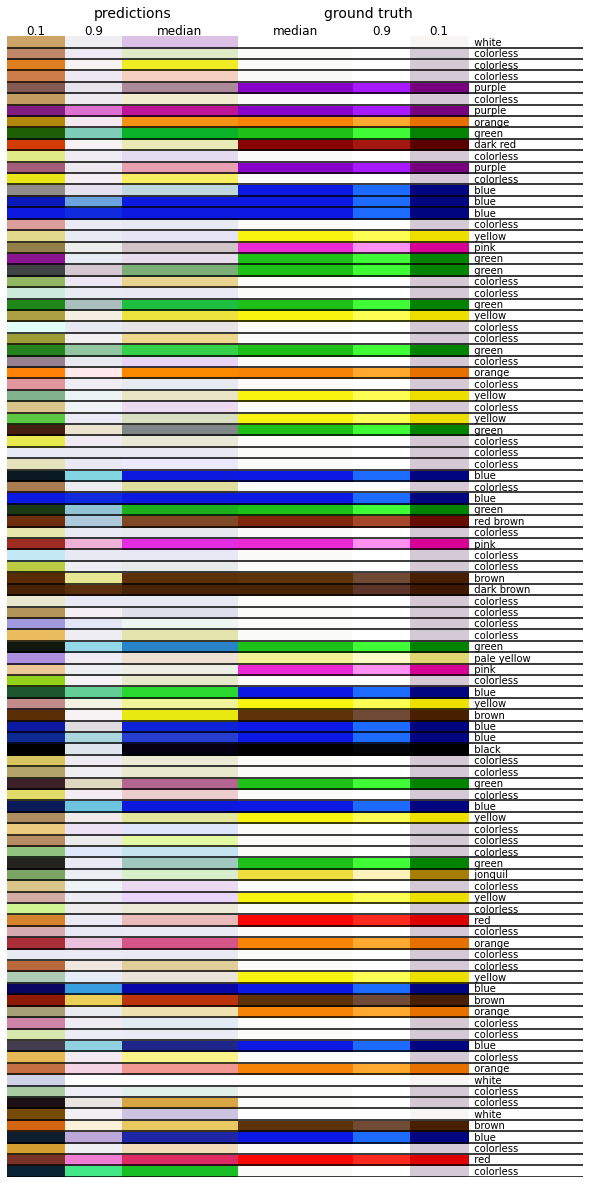

In [6]:
plot_prediction_dist(quantile01_prediction * 255, 
                     median_prediction * 255, 
                     quantile09_prediction * 255,
                     names,
                     augmentation_dict, 
                     100
                    )

In [97]:
ColorDistance(a[0], b[0])

289.8483108312105

In [99]:
a[0]

array([251.68537309, 193.59362169, 252.43937189])

In [100]:
b[0]

array([232., 234., 244.])

In [101]:
!pip install colormath

Processing /Users/kevinmaikjablonka/Library/Caches/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59/colormath-3.0.0-py3-none-any.whl


In [ ]:
from colorml.utils.utils import get_delta_e

In [16]:
color_delta_es = {}
means = []

for k,v in augmentation_dict.items():
    colors = len(v)
    meanc = []
    for i in range(colors):
        for j in range(colors): 
            if j>i: 
                meanc.append(get_delta_e(v[i], v[j]))
    color_delta_es[k] = meanc
    means.extend(meanc)

In [13]:
color_delta_es_medians = {}

for k, v in color_delta_es.items():
    color_delta_es_medians[k] = np.median(v)

In [27]:
smaller_5 = (np.array(list(color_delta_es_medians.values())) < 5)

In [32]:
5/len(color_delta_es_medians) * 100

3.571428571428571

In [33]:
color_delta_es_medians

{'amaranthine': 17.133877049889005,
 'amber': 16.78250967501643,
 'aquamarine': 27.45493439923363,
 'aubergine': 6.360234526029811,
 'azure': 18.752863616883594,
 'beige': 12.854870238330793,
 'black': 0.6690403877721824,
 'black brown': 11.943324183679362,
 'black green': 10.680589448715498,
 'black purple': 7.100646533995645,
 'black red': 7.316397139858927,
 'blackish purple': 7.501906673417155,
 'blue': 14.374019133608591,
 'blue green': 14.113023555911655,
 'blue violet': 9.350659328581383,
 'bluish violet': 6.653436361818926,
 'bright yellow': 5.867390831373608,
 'brown': 12.74530260973152,
 'brown orange': 14.884015337391311,
 'brown red': 6.457411928005046,
 'brown yellow': 12.496612952817975,
 'buff': 32.2950033705394,
 'cherry red': 12.279362263428574,
 'claybank': 26.17503421182174,
 'colorless': 5.66194485216962,
 'crimson': 15.245030137048277,
 'cyan': 10.528766477682769,
 'dark blue': 5.701484194374697,
 'dark brown': 9.349806779377232,
 'dark green': 12.480497096937468,


In [29]:
np.array(list(color_delta_es_medians.keys()))[smaller_5]

array(['black', 'red', 'white', 'whiteish colorless', 'yellow'],
      dtype='<U18')

In [36]:
np.mean(means)

12.10887233993671

(array([1.4676e+04, 1.0977e+04, 3.5140e+03, 1.1500e+03, 5.1600e+02,
        2.2800e+02, 9.6000e+01, 3.4000e+01, 2.7000e+01, 1.0000e+01]),
 array([ 0.        ,  9.23715197, 18.47430394, 27.71145591, 36.94860788,
        46.18575985, 55.42291182, 64.66006379, 73.89721576, 83.13436773,
        92.3715197 ]),
 <a list of 10 Patch objects>)

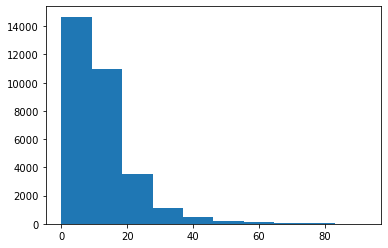

In [34]:
plt.hist(means)

In [46]:
differences = []


for ca, cb in zip(a, b):
    differences.append(get_delta_e(ca, cb))

In [47]:
np.median(differences)

16.132311267360382

In [155]:
import seaborn as sns

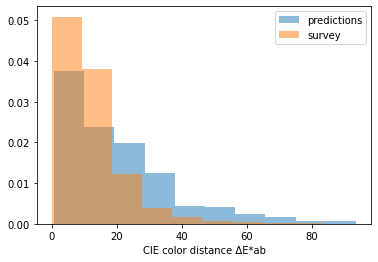

In [157]:
plt.hist(differences, density=True, alpha=.5, label='predictions')
plt.hist(means, density=True, alpha=.5, label='survey')
plt.xlabel('CIE color distance ΔE*ab')
plt.legend()